In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10

# Part 1: Initial Play-around with recurrent network, meta-learning models, and LSTM

In [10]:
# Define the meta-learning model
def create_model():
    model = keras.Sequential()
    model.add(layers.LSTM(64))
    model.add(layers.LSTM(64))
    model.add(layers.Dense(1))
    return model

In [16]:
import numpy as np
# ! pip install unidecode
import unidecode
import string
import time
import torch
import pdb

import torch.nn as nn
from torch.autograd import Variable
np.random.seed(123)

all_characters = string.printable
print(all_characters)

def read_file(filename):
    file = unidecode.unidecode(open(filename).read())
    return file

# NOTE: update to read-in text file for whichever natural language to learn:
file = read_file("shakespeare.txt")
file_len = len(file)
print(f"file length: {file_len}")
print(file[:100])

def get_random_chunk(file, chunk_len = 100):
    start_index = np.random.randint(0, len(file) - chunk_len)
    end_index = start_index + chunk_len + 1
    chunk = file[start_index:end_index]
    return chunk[:-1], chunk[1:]
    
curr_chunk, next_chunk = get_random_chunk(file='Hello world!', chunk_len=10)


def to_tensor(string):
    def char_to_one_hot(char):
        vec = np.zeros(len(all_characters))
        vec[all_characters.find(char)] = 1
        return vec
    tensor = torch.zeros(len(string), 1, len(all_characters))
    for i in range(len(string)):
        tensor[i] = torch.from_numpy(char_to_one_hot(string[i]))
    return tensor    

def get_one_hot_tensors(input, output):
    return to_tensor(input), to_tensor(output)
    
input, output = get_random_chunk(file, 50)
input_tensor, output_tensor = get_one_hot_tensors(input, output)
print(f"input shape: {input_tensor.shape}")
print(f"output shape: {output_tensor.shape}")


0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	

file length: 1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You
input shape: torch.Size([50, 1, 100])
output shape: torch.Size([50, 1, 100])


Automatic pdb calling has been turned ON
[(100 5.0%) 2.701960144042969]
[(200 10.0%) 2.3235096740722656]
[(300 15.0%) 2.1178022766113282]
[(400 20.0%) 2.124167633056641]
[(500 25.0%) 2.280020904541016]
[(600 30.0%) 2.1135765075683595]
[(700 35.0%) 2.430767364501953]
[(800 40.0%) 2.223056640625]
[(900 45.0%) 1.8499960327148437]
[(1000 50.0%) 1.9274630737304688]
[(1100 55.00000000000001%) 2.21108154296875]
[(1200 60.0%) 2.294605560302734]
[(1300 65.0%) 2.148157043457031]
[(1400 70.0%) 2.158061828613281]
[(1500 75.0%) 1.7836225891113282]
[(1600 80.0%) 2.1815789794921874]
[(1700 85.0%) 1.9058355712890624]
[(1800 90.0%) 1.7442526245117187]
[(1900 95.0%) 1.9847227478027343]
[(2000 100.0%) 1.62771728515625]
______________________________________________________________
There man the mast the sir.

DUKE OF YORK:
So the prouse a promes and the mast our shall be the best the mast the sones are me the best the mast the prouse here.

CAPULET:
O be my be the be the since th


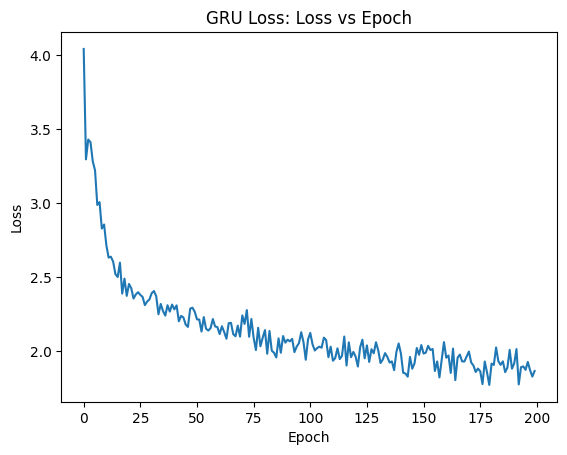

In [18]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        # Define modules of RNN
        # Set `self.rnn_cell` to a nn.GRU
        self.rnn_cell = nn.GRU(hidden_size, hidden_size, n_layers)
        
        # Define a linear decoder layer that maps from the hidden size to the output size
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        # 1. Reshape the input to (1, 1, -1) and pass it to the GRU layer
        # 2. Reshape the rnn_cell output to (1, -1) and pass it to the decoder layer
        output, hidden = self.rnn_cell(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))
    
def train(inp, target, decoder):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0

    input_tensor, target_tensor = get_one_hot_tensors(inp, target)
    for c in range(len(inp)):
        output, hidden = decoder(input_tensor[c], hidden)
        loss += criterion(output, torch.argmax(target_tensor[c]).unsqueeze(0))

    loss.backward()
    decoder_optimizer.step() 
    return loss.item() / max_length

def evaluate(decoder, prime_str='A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = to_tensor(prime_str)
    predicted = prime_str

    # Use priming string to "build up" hidden state
    for p in range(len(prime_str) - 1):
        out, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    for p in range(predict_len):
        # pdb.set_trace()
        output, hidden = decoder(inp, hidden)
        # if lstm_true:
        #     hidden = out, hidden            
        # Sample from the network as a multinomial distribution
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        # Add predicted character to string and use as next input
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = to_tensor(predicted_char)

    return predicted


%pdb on
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 100
n_layers = 1
lr = 0.005
max_length = len(all_characters)

decoder = RNN(max_length, hidden_size, max_length)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*get_random_chunk(file), decoder)       
    loss_avg += loss

    if epoch % print_every == 0:
        print(f"[({epoch} {epoch / n_epochs * 100}%) {loss}]")
        # print(evaluate(decoder, 'Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

print(f"______________________________________________________________")
print(evaluate(decoder, 'Th', 200, temperature=0.2))

import matplotlib.pyplot as plt
# plot all_losses here with x-axis as epoch and y-axis as loss value and title as "Loss vs Epoch"
plt.plot(all_losses)
plt.title("GRU Loss: Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[(100 5.0%) 3.171339416503906]
[(200 10.0%) 3.198677673339844]
[(300 15.0%) 3.3729827880859373]
[(400 20.0%) 3.2015423583984375]
[(500 25.0%) 2.8751315307617187]
[(600 30.0%) 2.648920593261719]
[(700 35.0%) 2.8768130493164064]
[(800 40.0%) 2.600023193359375]
[(900 45.0%) 2.7396926879882812]
[(1000 50.0%) 2.8468438720703126]
[(1100 55.00000000000001%) 2.5850460815429686]
[(1200 60.0%) 2.5481605529785156]
[(1300 65.0%) 2.286591033935547]
[(1400 70.0%) 2.362666015625]
[(1500 75.0%) 2.496773376464844]
[(1600 80.0%) 2.4110867309570314]
[(1700 85.0%) 2.3784130859375]
[(1800 90.0%) 2.698199462890625]
[(1900 95.0%) 2.298708190917969]
[(2000 100.0%) 2.3171762084960936]
______________________________________________________________
The the the the bererer the the the the the the the the the the the the the the the the the the the the seath in the the the the the the the the the the the the sour the the the the the the the the the 


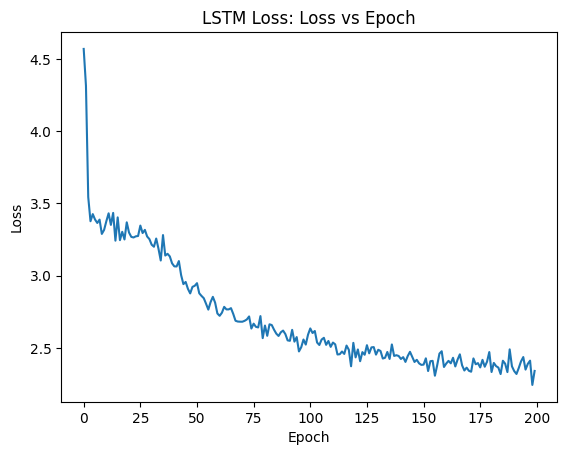

In [20]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias

        self.xh = nn.Linear(input_size, hidden_size * 4, bias=bias)
        self.hh = nn.Linear(hidden_size, hidden_size * 4, bias=bias)
        self.reset_parameters()

    def reset_parameters(self):
        std = 1.0 / np.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)

    def forward(self, input, hidden=None):
        # Unpack hidden state and cell state
        hx, cx = hidden
        
        # Apply linear layers to input and hidden state
        linear = self.xh(input) + self.hh(hx)

        # Get outputs of applying a linear transform for each part of the LSTM
        input_linear, forget_linear, cell_linear, output_linear = linear.reshape(-1).chunk(4)

        # LSTM mode (inputgate, forgetgate, cell, outputgate)
        
        i_t = torch.sigmoid(input_linear)
        f_t = torch.sigmoid(forget_linear)
        c_t = torch.tanh(cell_linear)
        o_t = torch.sigmoid(output_linear)

        # update LSTM for the new layer i and sigmoid output
        c_new = cx * f_t + i_t * c_t
        h_new = o_t * torch.tanh(c_new)
        
        # Pack cell state $C_t$ and hidden state $h_t$ into a single hidden state tuple
        output = h_new # For LSTM the output is just the hidden state
        hidden = (h_new, c_new) # Packed h and C
        return output, hidden
      
lr = 0.001
class LSTM_RNN(RNN):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Replace the gru cell with LSTM cell
        self.rnn_cell = LSTMCell(max_length, hidden_size, max_length)
        
    def init_hidden(self):
        # LSTM cells need two hidden variables in a tuple of (h_t,C_t)
        return (Variable(torch.zeros(1, 1, self.hidden_size)), Variable(torch.zeros(1, 1, self.hidden_size)))
      
decoder = LSTM_RNN(max_length, hidden_size, max_length)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)

all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    loss = train(*get_random_chunk(file),decoder)       
    loss_avg += loss

    if epoch % print_every == 0:
        print(f"[({epoch} {epoch / n_epochs * 100}%) {loss}]")
        # print(evaluate(decoder, 'Wh', 100), '\n')

    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0

print(f"______________________________________________________________")
print(evaluate(decoder, 'Th', 200, temperature=0.2))

plt.plot(all_losses)
plt.title("LSTM Loss: Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [2]:
# CIFAR-10 image data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Uncomment to compare between different models:
# 1. LSTM-based for image classification:
inputs = Input(shape=(32, 32, 3))
x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = Reshape((32, 64*32))(x)
x = LSTM(256, return_sequences=True)(x)
x = LSTM(256, return_sequences=True)(x)
x = LSTM(256)(x)
outputs = Dense(10)(x)

model = Model(inputs=inputs, outputs=outputs)

# Uncomment to compare between different models:
# 2. CNN purpose for image classification:

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(lr=0.001)

# Define the training functions
@tf.function
def train_on_task(model, optimizer, x, y):
    # Train the model on a single task
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = tf.reduce_mean(tf.square(predictions - y))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def meta_train(model, optimizer, num_epochs, num_tasks, x_train, y_train, x_test, y_test):
    # Train the model on multiple tasks
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for task in range(num_tasks):
            x_train_task = x_train[task*1:(task+1)*1]
            y_train_task = tf.keras.utils.to_categorical(y_train[task*1:(task+1)*1], num_classes=10)
            loss = train_on_task(model, optimizer, x_train_task, y_train_task)
            total_loss += loss

        # Uncomment the following to print images
        # x_test_task = x_test[0:10]
        # y_test_task = y_test[0:10]
        # predictions = model(x_test_task)
        # fig, axes = plt.subplots(2, 5, figsize=(10, 4))
        
        # for i, ax in enumerate(axes.flat):
        #     if i < 5:
        #         ax.imshow(x_train_task[i])
        #         ax.set_title('Train image')
        #     else:
        #         ax.imshow(x_test_task[i - 5])
        #         pred_label = np.argmax(predictions[i - 5])
        #         true_label = y_test_task[i - 5]
        #         ax.set_title(f'Test image\nTrue: {true_label}\nPred: {pred_label}')
        #     ax.axis('off')
        # plt.show()

        losses.append(total_loss / num_tasks)
        print(f"Epoch {epoch+1}/{num_epochs}: loss={losses[-1]}")
    return losses

# Train the model
num_epochs = 10
num_tasks = 1
lstm_losses = meta_train(model, optimizer, num_epochs, num_tasks, x_train, y_train, x_test, y_test)



Epoch 1/10: loss=0.09599889069795609
Epoch 2/10: loss=0.07855388522148132
Epoch 3/10: loss=0.08536002039909363
Epoch 4/10: loss=0.05792940780520439
Epoch 5/10: loss=0.02751031145453453
Epoch 6/10: loss=0.007433938328176737
Epoch 7/10: loss=0.0035272531677037477
Epoch 8/10: loss=0.006617134902626276
Epoch 9/10: loss=0.0047864289954304695
Epoch 10/10: loss=0.004212710540741682


In [4]:
# CIFAR-10 image data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Uncomment to compare between different models:
# 2. CNN purpose for image classification:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])


# Define the optimizer
optimizer = tf.keras.optimizers.Adam(lr=0.001)

# Define the training functions
@tf.function
def train_on_task(model, optimizer, x, y):
    # Train the model on a single task
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = tf.reduce_mean(tf.square(predictions - y))
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

def meta_train(model, optimizer, num_epochs, num_tasks, x_train, y_train, x_test, y_test):
    # Train the model on multiple tasks
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for task in range(num_tasks):
            x_train_task = x_train[task*100:(task+1)*100]
            y_train_task = tf.keras.utils.to_categorical(y_train[task*100:(task+1)*100], num_classes=10)
            loss = train_on_task(model, optimizer, x_train_task, y_train_task)
            total_loss += loss

        # Uncomment the following to print images
        # x_test_task = x_test[0:10]
        # y_test_task = y_test[0:10]
        # predictions = model(x_test_task)
        # fig, axes = plt.subplots(2, 5, figsize=(10, 4))
        
        # for i, ax in enumerate(axes.flat):
        #     if i < 5:
        #         ax.imshow(x_train_task[i])
        #         ax.set_title('Train image')
        #     else:
        #         ax.imshow(x_test_task[i - 5])
        #         pred_label = np.argmax(predictions[i - 5])
        #         true_label = y_test_task[i - 5]
        #         ax.set_title(f'Test image\nTrue: {true_label}\nPred: {pred_label}')
        #     ax.axis('off')
        # plt.show()

        losses.append(total_loss / num_tasks)
        print(f"Epoch {epoch+1}/{num_epochs}: loss={losses[-1]}")
    return losses

# Train the model
num_epochs = 10
num_tasks = 1
cnn_losses = meta_train(model, optimizer, num_epochs, num_tasks, x_train, y_train, x_test, y_test)


Epoch 1/10: loss=0.1017766147851944
Epoch 2/10: loss=0.030612194910645485
Epoch 3/10: loss=0.011965861544013023
Epoch 4/10: loss=0.004401349928230047
Epoch 5/10: loss=0.0028773329686373472
Epoch 6/10: loss=0.003076334251090884
Epoch 7/10: loss=0.0025389613583683968
Epoch 8/10: loss=0.0015981452306732535
Epoch 9/10: loss=0.0012984102359041572
Epoch 10/10: loss=0.001003660261631012


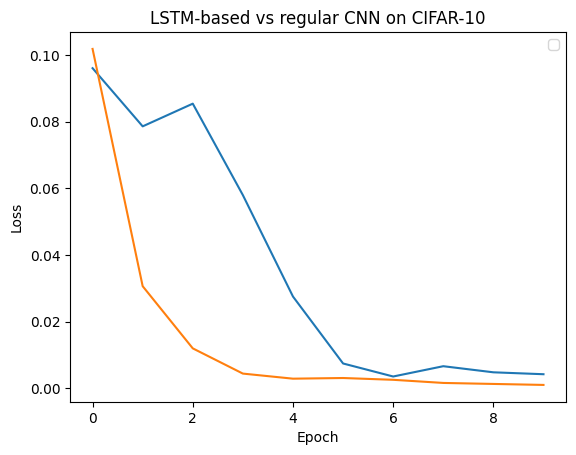

In [7]:
# Plot the loss
plt.plot(lstm_losses)
plt.plot(cnn_losses)
plt.title('LSTM-based vs regular CNN on CIFAR-10')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Additional comparisons with MAML, a model greatly inspired by the Optimization as a Model for Few shot Leraning Paper. This part is for comparison and code is mainly adapted from: 

https://github.com/sudharsan13296/Hands-On-Meta-Learning-With-Python/blob/master/06.%20MAML%20and%20it's%20Variants/6.5%20Building%20MAML%20From%20Scratch.ipynb

In [23]:
import numpy as np

def sample_points(k):
    x = np.random.rand(k,50)
    y = np.random.choice([0, 1], size=k, p=[.5, .5]).reshape([-1,1])
    return x,y

In [24]:
x, y = sample_points(10)
print(x[0])
print(y[0])

[0.35703642 0.94638713 0.27540029 0.10865058 0.1013546  0.00757966
 0.26893521 0.11726071 0.12300811 0.93045945 0.24616433 0.04681827
 0.62920641 0.53703109 0.13697641 0.5290348  0.444392   0.45237015
 0.10380911 0.86303843 0.70968505 0.85653567 0.52150354 0.94308347
 0.39841615 0.70294091 0.99767238 0.53431471 0.02501347 0.06754836
 0.00583777 0.55832641 0.85739128 0.88315999 0.32240333 0.46161957
 0.53068753 0.2002706  0.59419097 0.24687518 0.13825984 0.3972467
 0.62195154 0.67864493 0.38553436 0.51967821 0.47713383 0.53597597
 0.12739501 0.70189857]
[1]


In [28]:
class MAML(object):
    def __init__(self):
        
        #initialize number of tasks i.e number of tasks we need in each batch of tasks
        self.num_tasks = 10
        
        #number of samples i.e number of shots  -number of data points (k) we need to have in each task
        self.num_samples = 10

        #number of epochs i.e training iterations
        self.epochs = 10000
        
        #hyperparameter for the inner loop (inner gradient update)
        self.alpha = 0.0001
        
        #hyperparameter for the outer loop (outer gradient update) i.e meta optimization
        self.beta = 0.0001
       
        #randomly initialize our model parameter theta
        self.theta = np.random.normal(size=50).reshape(50, 1)
      
    #define our sigmoid activation function  
    def sigmoid(self,a):
        return 1.0 / (1 + np.exp(-a))
    
    
    #now let us get to the interesting part i.e training :P
    def train(self):
        
        #for the number of epochs,
        for e in range(self.epochs):        
            
            self.theta_ = []
            
            #for task i in batch of tasks
            for i in range(self.num_tasks):
               
                #sample k data points and prepare our train set
                XTrain, YTrain = sample_points(self.num_samples)
                
                a = np.matmul(XTrain, self.theta)

                YHat = self.sigmoid(a)

                #since we are performing classification, we use cross entropy loss as our loss function
                loss = ((np.matmul(-YTrain.T, np.log(YHat)) - np.matmul((1 -YTrain.T), np.log(1 - YHat)))/self.num_samples)[0][0]
                
                #minimize the loss by calculating gradients
                gradient = np.matmul(XTrain.T, (YHat - YTrain)) / self.num_samples

                #update the gradients and find the optimal parameter theta' for each of tasks
                self.theta_.append(self.theta - self.alpha*gradient)
                
     
            #initialize meta gradients
            meta_gradient = np.zeros(self.theta.shape)
                        
            for i in range(self.num_tasks):
            
                #sample k data points and prepare our test set for meta training
                XTest, YTest = sample_points(10)

                #predict the value of y
                a = np.matmul(XTest, self.theta_[i])
                
                YPred = self.sigmoid(a)
                           
                #compute meta gradients
                meta_gradient += np.matmul(XTest.T, (YPred - YTest)) / self.num_samples

  
            #update our randomly initialized model parameter theta with the meta gradients
            self.theta = self.theta-self.beta*meta_gradient/self.num_tasks
                                       
            if e%1000==0:
                print("Epoch {}: Loss {}\n".format(e,loss))             
                print('Updated Model Parameter Theta\n')
                print('Sampling Next Batch of Tasks \n')
                print('---------------------------------\n')

In [29]:
model = MAML()

In [30]:
model.train()

Epoch 0: Loss 2.765055408281674

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 1000: Loss 1.2500640016728362

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 2000: Loss 1.4882012166472305

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 3000: Loss 2.369244798585001

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 4000: Loss 1.2359189286790029

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 5000: Loss 1.7386522858123825

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 6000: Loss 0.875042695317908

Updated Model Parameter Theta

Sampling Next Batch of Tasks 

---------------------------------

Epoch 7000: Loss 1.4436811058788783

Updated Model Parameter Theta

